# Model Development

Model = Mathematical equation used to predict a value given one or more other values

Relating 1 or more independent variables to dependent variables

## Linear regression and Multiple linear Regression

Linear regression will refer to one independent variable to make a prediction 

Multiple will refer to multiple independent variables

### Linear regression
1) Predictor (Independent) variable -x
2) Target (Dependent) variable -y

y = b₀ + b₁x
b₀: Intercept
b₁: Slope



In [136]:
import pandas as pd

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(path, header = None)

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
           "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
           "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

df["price"] = pd.to_numeric(df["price"], errors="coerce")

df.dropna(subset = ["price"], axis = 0, inplace = True)

df.dropna(subset = ["highway-mpg"], axis = 0, inplace = True)


print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [137]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = df[["highway-mpg"]]

Y = df["price"]



Then we use lm.fit(X,Y) to fit the model 



In [138]:
lm.fit(X,Y)

LinearRegression()

In [139]:
Yhat = lm.predict(X)

b_0 = lm.intercept_

print(b_0)

b_1 = lm.coef_

print(b_1)

38423.3058581574
[-821.73337832]


Price = 38423.31 - 821.73 * highway-mpg

### Multiple Linear Regression (MLR)

The method is used to explain the relationship between:
    + One continous target (Y) variable
    + Two or more predictor (X) variables

we can extract the 4 predictor variables and store them in th variable Z

In [141]:

df.dropna(subset = ["horsepower"], axis = 0, inplace = True)

df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

df.dropna(subset = ["curb-weight"], axis = 0, inplace = True)

df["engine-size"] = pd.to_numeric(df["engine-size"], errors="coerce")

df.dropna(subset = ["engine-size"], axis = 0, inplace = True)


Z = df[["horsepower","curb-weight", "engine-size", "highway-mpg"]]


lm.fit(Z, df["price"])

LinearRegression()

In [142]:
Yhat = lm.predict(Z)

print(lm.intercept_)

print(lm.coef_)

-15700.573979039304
[53.27878556  4.66217408 82.22948394 35.5175845 ]


## Model evaluation using Visualization

### Regression Plot
Relationship 2 variables
Stength of the correlation
Direction of the relationship
It shows a combination of:
+ scatterplot Where each point represents a different y
+ Fitted linear regression line


(0.0, 48175.745048325574)

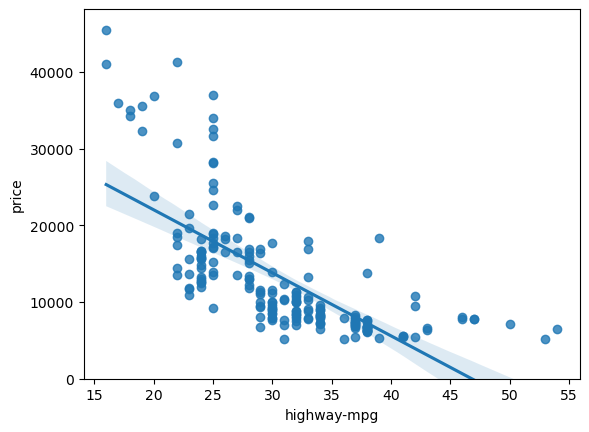

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = "highway-mpg",
            y = "price",
            data = df)
plt.ylim(0,)

<Axes: xlabel='highway-mpg', ylabel='price'>

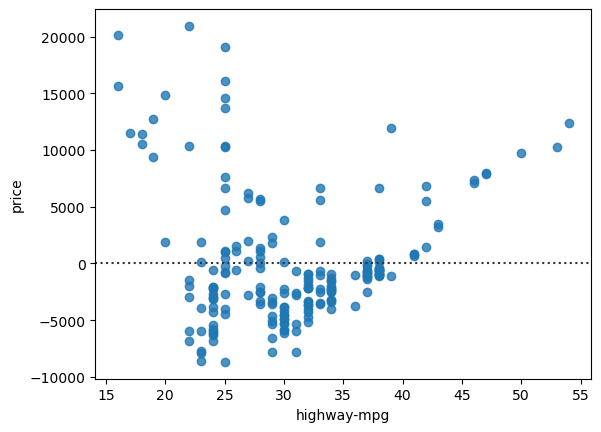

In [117]:
import seaborn as sns

sns.residplot(x = df["highway-mpg"], y = df["price"])

### Distribution plot
A distribution plot is a graphical visualization that shows the distribution of a variable. It is commonly used to examine the shape of a distribution, identify outliers, and observe data patterns. 

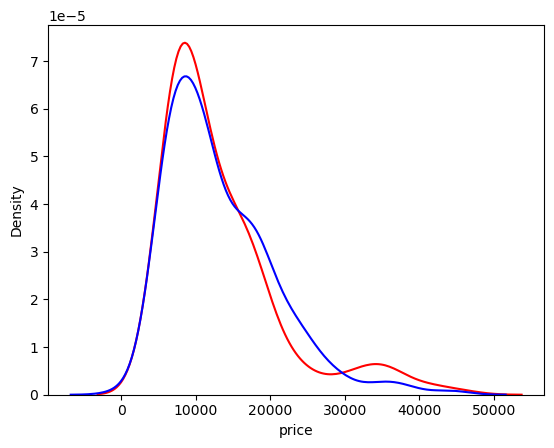

In [118]:
ax1 = sns.kdeplot(data=df["price"], color="r", label="Actual value")

ax1 = sns.kdeplot(Yhat, color="b", label="Fitted Values")
# Yhat hace referencia a la predicción del precio

No llega a ser un buen modelo de prediccón sobretodo para los precios por encima de 30000

<Axes: xlabel='price', ylabel='Count'>

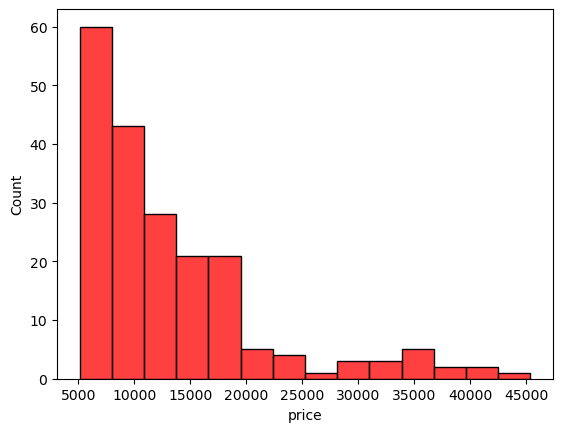

In [119]:
sns.histplot(data=df, x="price", color="r", label="Actual value")


## Polynomial regression and pipelines
Polynomial regression

Special case of the general regression model 
Describe curvilinear relationships

### Quadratic 2nd order
y = β0 + β1x + β2x^2

### Cubic 3 order
y = β0 + β1x + β2x^2 + β3x^3

f = np.polyfit(x,y,3)
p = np.poly1d(f)

In [120]:
X = df["highway-mpg"].values

Y = df["price"]

import numpy as np

f = np.polyfit(X,Y,3)
p = np.poly1d(f)

print(p)

        3         2
-1.553 x + 204.3 x - 8948 x + 1.377e+05


## Polynomial regression

We can also hace multidimensional polynomial regression

The preprocessing library scikit-learn 

In [121]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 2, include_bias = False)

X = df[["horsepower","curb-weight", "engine-size", "highway-mpg"]]

x_polly = pr.fit_transform(X.loc[:, ["horsepower", "curb-weight"]])

print(x_polly)

[[1.1100000e+02 2.5480000e+03 1.2321000e+04 2.8282800e+05 6.4923040e+06]
 [1.1100000e+02 2.5480000e+03 1.2321000e+04 2.8282800e+05 6.4923040e+06]
 [1.5400000e+02 2.8230000e+03 2.3716000e+04 4.3474200e+05 7.9693290e+06]
 [1.0200000e+02 2.3370000e+03 1.0404000e+04 2.3837400e+05 5.4615690e+06]
 [1.1500000e+02 2.8240000e+03 1.3225000e+04 3.2476000e+05 7.9749760e+06]
 [1.1000000e+02 2.5070000e+03 1.2100000e+04 2.7577000e+05 6.2850490e+06]
 [1.1000000e+02 2.8440000e+03 1.2100000e+04 3.1284000e+05 8.0883360e+06]
 [1.1000000e+02 2.9540000e+03 1.2100000e+04 3.2494000e+05 8.7261160e+06]
 [1.4000000e+02 3.0860000e+03 1.9600000e+04 4.3204000e+05 9.5233960e+06]
 [1.0100000e+02 2.3950000e+03 1.0201000e+04 2.4189500e+05 5.7360250e+06]
 [1.0100000e+02 2.3950000e+03 1.0201000e+04 2.4189500e+05 5.7360250e+06]
 [1.2100000e+02 2.7100000e+03 1.4641000e+04 3.2791000e+05 7.3441000e+06]
 [1.2100000e+02 2.7650000e+03 1.4641000e+04 3.3456500e+05 7.6452250e+06]
 [1.2100000e+02 3.0550000e+03 1.4641000e+04 3.69655

x_polly is the transformed feature matrix obtained after applying polynomial transformation to the original features. It represents the input data with additional polynomial features, allowing for more flexible modeling of the relationship between the features and the target variable.

We use x_polly to capture non-linear relationships between the features and the target variable. By introducing polynomial features, we can fit polynomial regression models that can better capture complex patterns in the data. This can be particularly useful when the relationship between the features and the target variable is not strictly linear.

In summary, x_polly is used as the input data for modeling purposes, allowing us to explore and capture non-linear relationships between the features and the target variable.


### Pre-processing

We can Normalize each feature simultaneously 

In [122]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()

x_data = df[["horsepower","curb-weight", "engine-size", "highway-mpg"]]

SCALE.fit(x_data[["horsepower", "highway-mpg"]])

x_scale = SCALE.transform(x_data[["horsepower", "highway-mpg"]])

## Pipelines

Normalization & Polynomial transform

In [123]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline



### Pipeline constructor


In [124]:
Input = [("scale", StandardScaler()), 
         ("polynomial", PolynomialFeatures(degree = 2)),
         ("mode", LinearRegression())]

Y = df["price"]

Pipe = Pipeline(Input)

Pipe.fit(x_data, Y)

yhat = Pipe.predict(x_data)


## Measures for In-Sample Evaluation
How good the model fits on a dataset
Two important measures
+ Mean Squared Error(MSE)
+ R-Squared(R^2)

### Mean-Squared-Error

In [125]:
from sklearn.metrics import mean_squared_error

lm = LinearRegression()

Z = df[["horsepower","curb-weight", "engine-size", "highway-mpg"]]

Y = df["price"]

lm.fit(Z, df["price"])

Y_predict_simple_fit = lm.predict(Z)


mean_squared_error(df["price"], Y_predict_simple_fit)

11941505.191703446

### R-Squared
+ The coefficient of determination or R-squared is a meassure to determine how close the data is to fitted regression line


In [129]:
X = df[["highway-mpg"]]
Y = df["price"]

lm.fit(X,Y)

lm.score(X,Y)

0.4973491560296689

## Prediction & Decition making

To determine best fit, we look at a combination of:
+ Do the predicted values make sense
+ Visualization
+ Numerical measures for evaluation
+ Comparing models

1) First we train the model

In [143]:
X = df[["highway-mpg"]]
Y = df["price"]


lm.fit(X,Y)

lm.predict(np.array(30).reshape(-1,1))

C:\Users\julio\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13804.86252368])